# Explore here

In [23]:
# Your code here
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 1: Data collection

In [24]:
import pandas as pd

data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


#### Step 2: Exploration and data cleaning

In [25]:
# Obtain dimensions
data.shape

(48895, 16)

In [26]:
print(f"The DataFrame contains {len(data)} records (rows) and {len(data.columns)} variables (columns).\n")

The DataFrame contains 48895 records (rows) and 16 variables (columns).



In [27]:
# Obtain information about data types and non-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [28]:
print("We see that we have some NaN records, the biggest ones being last_review and reviews_per_month columns.")

We see that we have some NaN records, the biggest ones being last_review and reviews_per_month columns.


In [29]:
categorical_columns=["id", "name", "host_id", "host_name", "neighbourhood_group", "neighbourhood", "room_type", "availability_365"]
df_categorical_columns=data[categorical_columns]
df_categorical_columns.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,0


In [30]:
numerical_columns=["price", "latitude", "longitude", "minimum_nights", "number_of_reviews", "last_review", "reviews_per_month", "calculated_host_listings_count"]
df_numerical_columns=data[numerical_columns]
df_numerical_columns.head()

,price,latitude,longitude,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count
0,149,40.64749,-73.97237,1,9,2018-10-19,0.21,6
1,225,40.75362,-73.98377,1,45,2019-05-21,0.38,2
2,150,40.80902,-73.94190,3,0,NaN,NaN,1
3,89,40.68514,-73.95976,1,270,2019-07-05,4.64,1
4,80,40.79851,-73.94399,10,9,2018-11-19,0.10,1


In [31]:
print("Analysing the data we can divide the data in 8 categorical variables and 8 numerical variables.\n")
print(f"Categorical variables:{df_categorical_columns.columns}\n")
print(f"Numerical variables:{df_numerical_columns.columns}\n")

Analysing the data we can divide the data in 8 categorical variables and 8 numerical variables.

Categorical variables:Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'room_type', 'availability_365'],
      dtype='object')

Numerical variables:Index(['price', 'latitude', 'longitude', 'minimum_nights', 'number_of_reviews',
       'last_review', 'reviews_per_month', 'calculated_host_listings_count'],
      dtype='object')



Eliminate duplicates

In [32]:
data_dropped=data.dropna()
data_dropped.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [33]:
data_dropped.shape

(38821, 16)

In [34]:
print(f"I eliminated the rows with NaN values, reducing the DataFrame from ({len(data)}, {len(data.columns)}) to ({len(data_dropped)}, {len(data_dropped.columns)})")
print(f"Doing that I eliminated {(len(data))-(len(data_dropped))} rows, deleting {round((1-((len(data_dropped))/(len(data))))*(100),2)}% of the data, which may be significant for the analysis.")

I eliminated the rows with NaN values, reducing the DataFrame from (48895, 16) to (38821, 16)
Doing that I eliminated 10074 rows, deleting 20.6% of the data, which may be significant for the analysis.


In [35]:
print(f"The number of duplicated Name records is: {data['name'].duplicated().sum()}")
print(f"The number of duplicated Host ID records is: {data['host_id'].duplicated().sum()}")
print(f"The number of duplicated ID records is: {data['id'].duplicated().sum()}")

The number of duplicated Name records is: 989
The number of duplicated Host ID records is: 11438
The number of duplicated ID records is: 0


In [36]:
print("name has duplicated values, which is odd, but duplicates can exist, since people can put the same names")
print("host_id can have duplicates, because some homeowners have multiple Airbnbs registered.")
print("There are 0 duplicated id, which means it should be all unique records.")

name has duplicated values, which is odd, but duplicates can exist, since people can put the same names
host_id can have duplicates, because some homeowners have multiple Airbnbs registered.
There are 0 duplicated id, which means it should be all unique records.


Eliminate irrelevant information

In [37]:
print("Eliminating the columns with duplicate values is a better solution in order to redice the zise of our DataFrame")
print("I also remove the latitude and longitude columns to simplify reading the DataFrame")

Eliminating the columns with duplicate values is a better solution in order to redice the zise of our DataFrame
I also remove the latitude and longitude columns to simplify reading the DataFrame


In [38]:
data_c=data.copy()
data_c.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [39]:
data_c.drop(["id", "name", "host_name", "last_review", "reviews_per_month", "latitude", "longitude"], axis = 1, inplace = True)
data_c.head()

,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,Private room,149,1,9,6,365
1,2845,Manhattan,Midtown,Entire home/apt,225,1,45,2,355
2,4632,Manhattan,Harlem,Private room,150,3,0,1,365
3,4869,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,1,194
4,7192,Manhattan,East Harlem,Entire home/apt,80,10,9,1,0


In [40]:
data_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   host_id                         48895 non-null  int64 
 1   neighbourhood_group             48895 non-null  object
 2   neighbourhood                   48895 non-null  object
 3   room_type                       48895 non-null  object
 4   price                           48895 non-null  int64 
 5   minimum_nights                  48895 non-null  int64 
 6   number_of_reviews               48895 non-null  int64 
 7   calculated_host_listings_count  48895 non-null  int64 
 8   availability_365                48895 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 3.4+ MB


### Step 3: Analysis of univariate variables

Analysis of categorical variables

In [41]:
new_categorical_columns=["host_id", "neighbourhood_group", "neighbourhood", "room_type", "availability_365"]
df_new_categorical_columns=data_c[new_categorical_columns]
df_new_categorical_columns.head()

,host_id,neighbourhood_group,neighbourhood,room_type,availability_365
0,2787,Brooklyn,Kensington,Private room,365
1,2845,Manhattan,Midtown,Entire home/apt,355
2,4632,Manhattan,Harlem,Private room,365
3,4869,Brooklyn,Clinton Hill,Entire home/apt,194
4,7192,Manhattan,East Harlem,Entire home/apt,0


In [42]:
host_id=data_c["host_id"].value_counts()
print(f"{host_id}\n")

host_id
219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
            ... 
11274802       1
76487242       1
76477851       1
76453466       1
3156684        1
Name: count, Length: 37457, dtype: int64



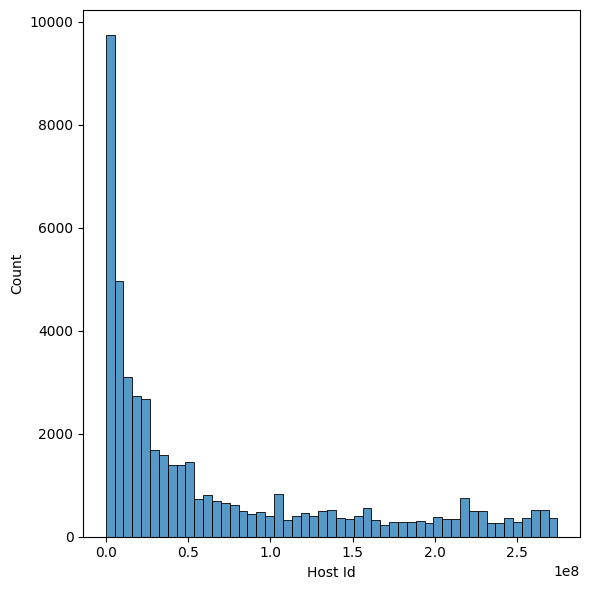

In [43]:
plt.figure(figsize=(6,6))
sns.histplot(data = data_c, x = "host_id").set(xlabel ="Host Id", ylabel = "Count", title =None)
plt.tight_layout()
plt.show()

In [44]:
print("There are multiple Hosts with many rooms to rent.")

There are multiple Hosts with many rooms to rent.


In [45]:
neighbourhood_group=data_c["neighbourhood_group"].value_counts()
print(f"{neighbourhood_group}\n")

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64



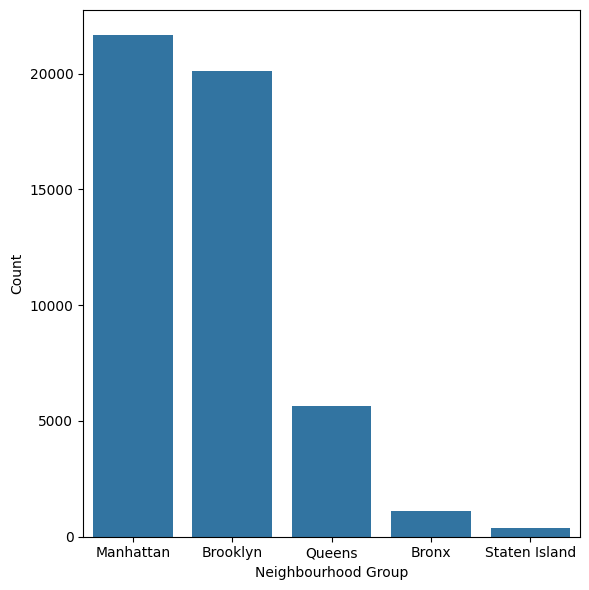

In [46]:
plt.figure(figsize=(6,6))
sns.barplot(x=neighbourhood_group.index, y=neighbourhood_group.values).set(xlabel ="Neighbourhood Group", ylabel = "Count", title =None)
plt.tight_layout()
plt.show()

In [47]:
print("In our dataset, we only have 5 areas, Brooklyn, Manhattan, Queens, Staten Island, and the Bronx")
print("Most of the houses offered are in Manhattan follewed by Brooklyn and Queens")

In our dataset, we only have 5 areas, Brooklyn, Manhattan, Queens, Staten Island, and the Bronx
Most of the houses offered are in Manhattan follewed by Brooklyn and Queens


In [48]:
neighbourhood=data_c["neighbourhood"].value_counts()
print(f"{neighbourhood}\n")

neighbourhood
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Richmondtown             1
Fort Wadsworth           1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: count, Length: 221, dtype: int64



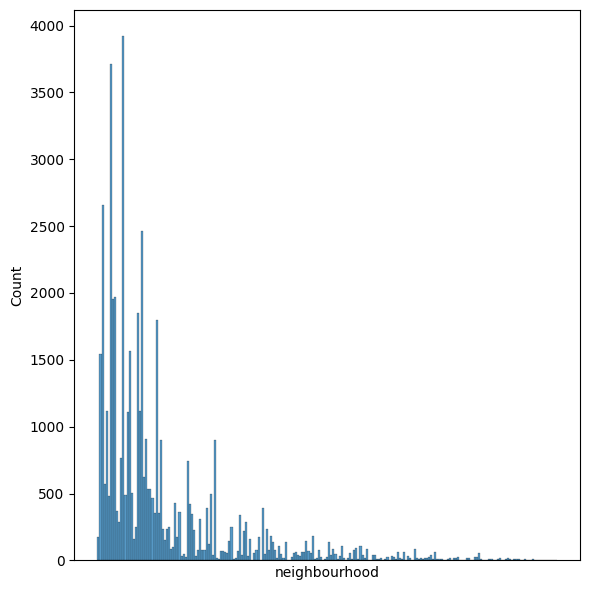

In [49]:
plt.figure(figsize=(6,6))
fg3=sns.histplot(data = data_c, x = "neighbourhood").set_xticks([])
plt.tight_layout()
plt.show()

In [50]:
print("In the same way the offered houses are concetrated in some neighborhoods.")

In the same way the offered houses are concetrated in some neighborhoods.


In [51]:
room_type=data_c["room_type"].value_counts()
print(f"{room_type}\n")

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64



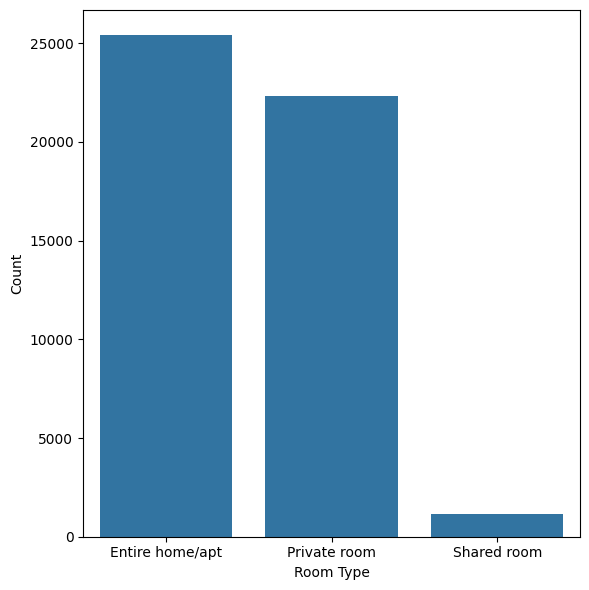

In [52]:
plt.figure(figsize=(6,6))
sns.barplot(x=room_type.index, y=room_type.values).set(xlabel ="Room Type", ylabel = "Count", title =None)
plt.tight_layout()
plt.show()


In [53]:
print("There are more availability of entire Homes/Apts to rent than Private Rooms, and Shared Rooms is the least available type of room.")

There are more availability of entire Homes/Apts to rent than Private Rooms, and Shared Rooms is the least available type of room.


In [54]:
availability_365=data_c["availability_365"].value_counts()
print(f"{availability_365}\n")

availability_365
0      17533
365     1295
364      491
1        408
89       361
       ...  
195       26
183       24
196       24
181       23
202       20
Name: count, Length: 366, dtype: int64



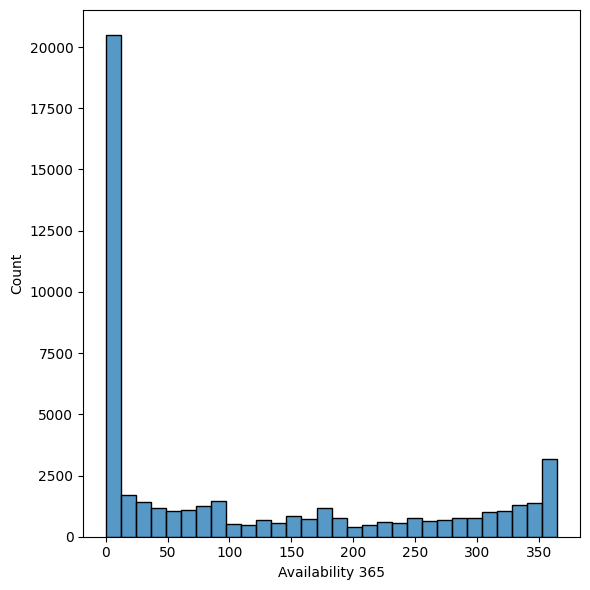

In [55]:
plt.figure(figsize=(6,6))
sns.histplot(data = data_c, x = "availability_365").set(xlabel = "Availability 365", ylabel = "Count", title = None)
plt.tight_layout()
plt.show()

In [56]:
print("Most of the houses are not available during the year, however, there are plenty of them that are available all the year")

Most of the houses are not available during the year, however, there are plenty of them that are available all the year


Analysis on numeric variables

In [57]:
new_numerical_columns=["price", "minimum_nights", "number_of_reviews", "calculated_host_listings_count"]
df_new_numerical_columns=data_c[new_numerical_columns]
df_new_numerical_columns.head()

,price,minimum_nights,number_of_reviews,calculated_host_listings_count
0,149,1,9,6
1,225,1,45,2
2,150,3,0,1
3,89,1,270,1
4,80,10,9,1


<Figure size 600x600 with 0 Axes>

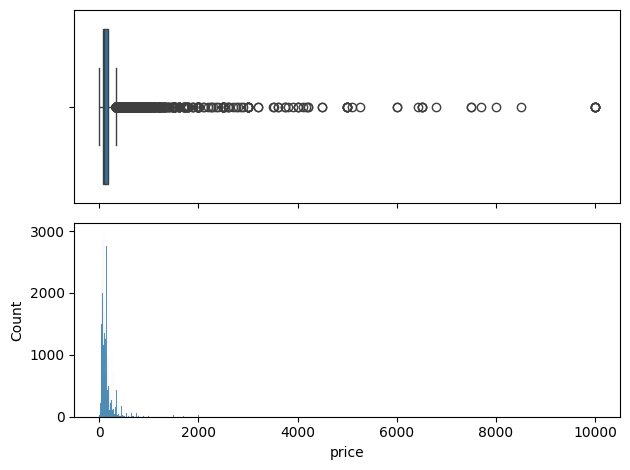

In [58]:
plt.figure(figsize=(6,6))
f,(box,hist)=plt.subplots(2,sharex=True)
sns.histplot(x=data_c["price"],ax=hist)
sns.boxplot(x=data_c["price"],ax=box)

plt.tight_layout()
plt.show()

<Figure size 600x600 with 0 Axes>

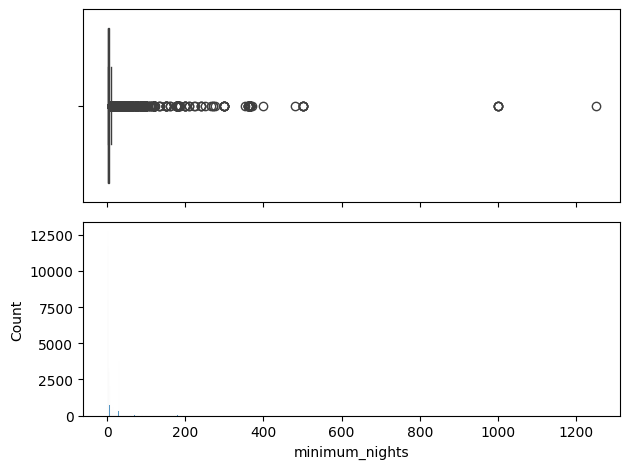

In [59]:
plt.figure(figsize=(6,6))
f,(box,hist)=plt.subplots(2,sharex=True)
sns.histplot(x=data_c["minimum_nights"],ax=hist)
sns.boxplot(x=data_c["minimum_nights"],ax=box)

plt.tight_layout()
plt.show()

<Figure size 600x600 with 0 Axes>

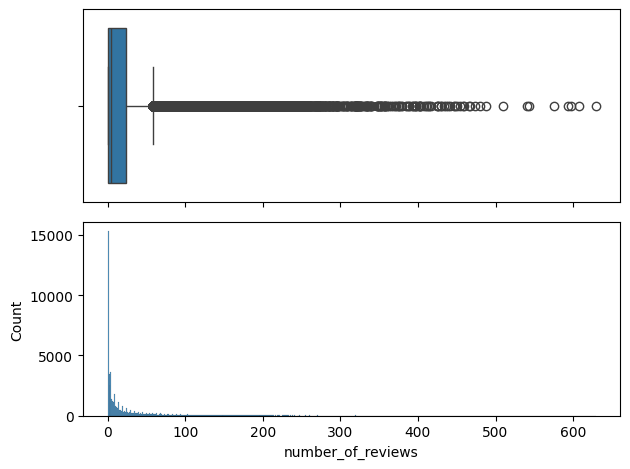

In [60]:
plt.figure(figsize=(6,6))
f,(box,hist)=plt.subplots(2,sharex=True)
sns.histplot(x=data_c["number_of_reviews"],ax=hist)
sns.boxplot(x=data_c["number_of_reviews"],ax=box)

plt.tight_layout()
plt.show()

<Figure size 600x600 with 0 Axes>

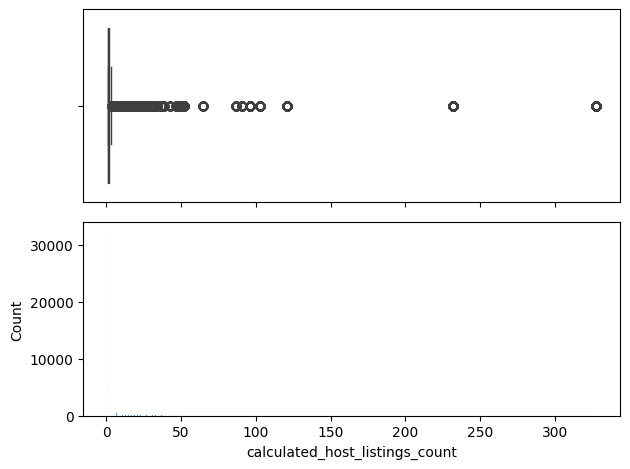

In [61]:
plt.figure(figsize=(6,6))
f,(box,hist)=plt.subplots(2,sharex=True)
sns.histplot(x=data_c["calculated_host_listings_count"],ax=hist)
sns.boxplot(x=data_c["calculated_host_listings_count"],ax=box)

plt.tight_layout()
plt.show()

In [62]:
print("Analyzing the graphs, there are many values ​​out of range.")

Analyzing the graphs, there are many values ​​out of range.


#### Step 4: Analysis of multivariate variables

Numerical-numerical analysis

<Axes: >

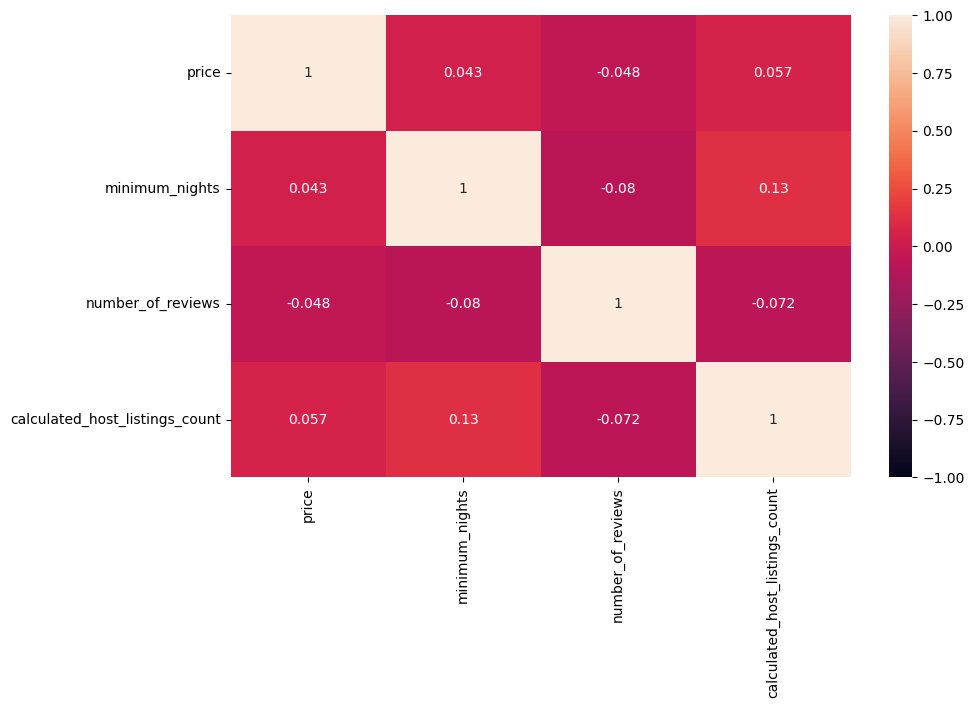

In [63]:
plt.figure(figsize=(10,6))
sns.heatmap(data_c[new_numerical_columns].corr().round(3),vmax=1,vmin=-1,annot=True)

In [64]:
print("Looking at the above relationships, we see that the relationship between the numerical variables is very low")

Looking at the above relationships, we see that the relationship between the numerical variables is very low


Categorical-categorical analysis

In [65]:
df_new_categorical_columns

,host_id,neighbourhood_group,neighbourhood,room_type,availability_365
0,2787,Brooklyn,Kensington,Private room,365
1,2845,Manhattan,Midtown,Entire home/apt,355
2,4632,Manhattan,Harlem,Private room,365
3,4869,Brooklyn,Clinton Hill,Entire home/apt,194
4,7192,Manhattan,East Harlem,Entire home/apt,0
...,...,...,...,...,...
48890,8232441,Brooklyn,Bedford-Stuyvesant,Private room,9
48891,6570630,Brooklyn,Bushwick,Private room,36
48892,23492952,Manhattan,Harlem,Entire home/apt,27
48893,30985759,Manhattan,Hell's Kitchen,Shared room,2


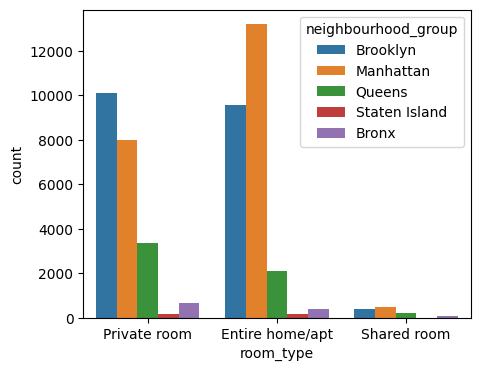

In [66]:
fig, axis = plt.subplots(figsize = (5, 4))

sns.countplot(data = data_c, x = "room_type", hue = "neighbourhood_group")

# Show the plot
plt.show()

In [67]:
print("Again, we see that the most of the available houses are located in Manhattan.")
print("There are not many shared rooms available for rent, by the other hand, there are many Entire home/aptments available for rent, meaning probably more people sharing their home or trying to maximize.")

Again, we see that the most of the available houses are located in Manhattan.
There are not many shared rooms available for rent, by the other hand, there are many Entire home/aptments available for rent, meaning probably more people sharing their home or trying to maximize.


Numerical-categorical analysis (complete)

In [68]:
data_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   host_id                         48895 non-null  int64 
 1   neighbourhood_group             48895 non-null  object
 2   neighbourhood                   48895 non-null  object
 3   room_type                       48895 non-null  object
 4   price                           48895 non-null  int64 
 5   minimum_nights                  48895 non-null  int64 
 6   number_of_reviews               48895 non-null  int64 
 7   calculated_host_listings_count  48895 non-null  int64 
 8   availability_365                48895 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 3.4+ MB


In [69]:
# Factorize the Room Type and Neighborhood Data
data_c["room_type"] = pd.factorize(data_c["room_type"])[0]
data_c["neighbourhood_group"] = pd.factorize(data_c["neighbourhood_group"])[0]
data_c["neighbourhood"] = pd.factorize(data_c["neighbourhood"])[0]

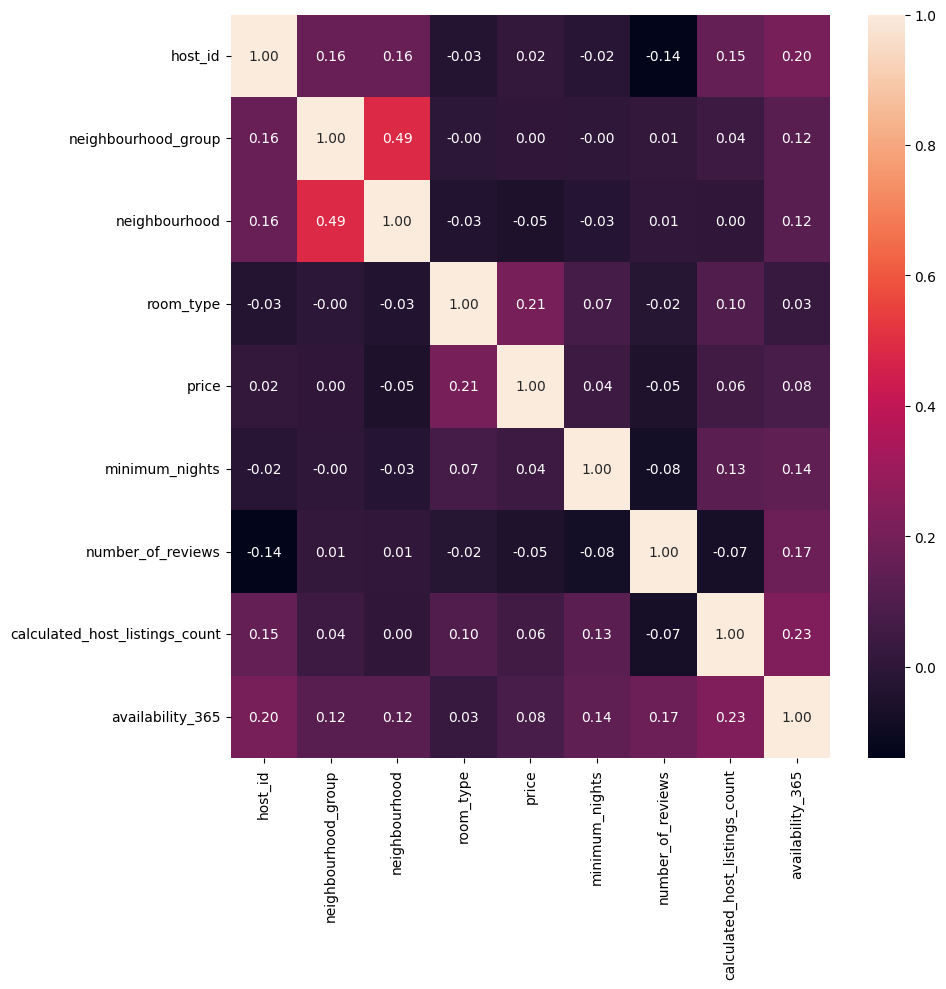

In [70]:
fig, axes = plt.subplots(figsize=(10, 10))

sns.heatmap(data_c[["host_id", "neighbourhood_group", "neighbourhood", "room_type", "price", "minimum_nights", "number_of_reviews", "calculated_host_listings_count", "availability_365"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

# Draw Plot
plt.show()

In [71]:
print("Looking at the data here, there's a very low correlation between all the data.")
print("As expected, there is a strong relationship between neighborhoods and Boroughs.")

Looking at the data here, there's a very low correlation between all the data.
As expected, there is a strong relationship between neighborhoods and Boroughs.


Analysing all the Data at Once

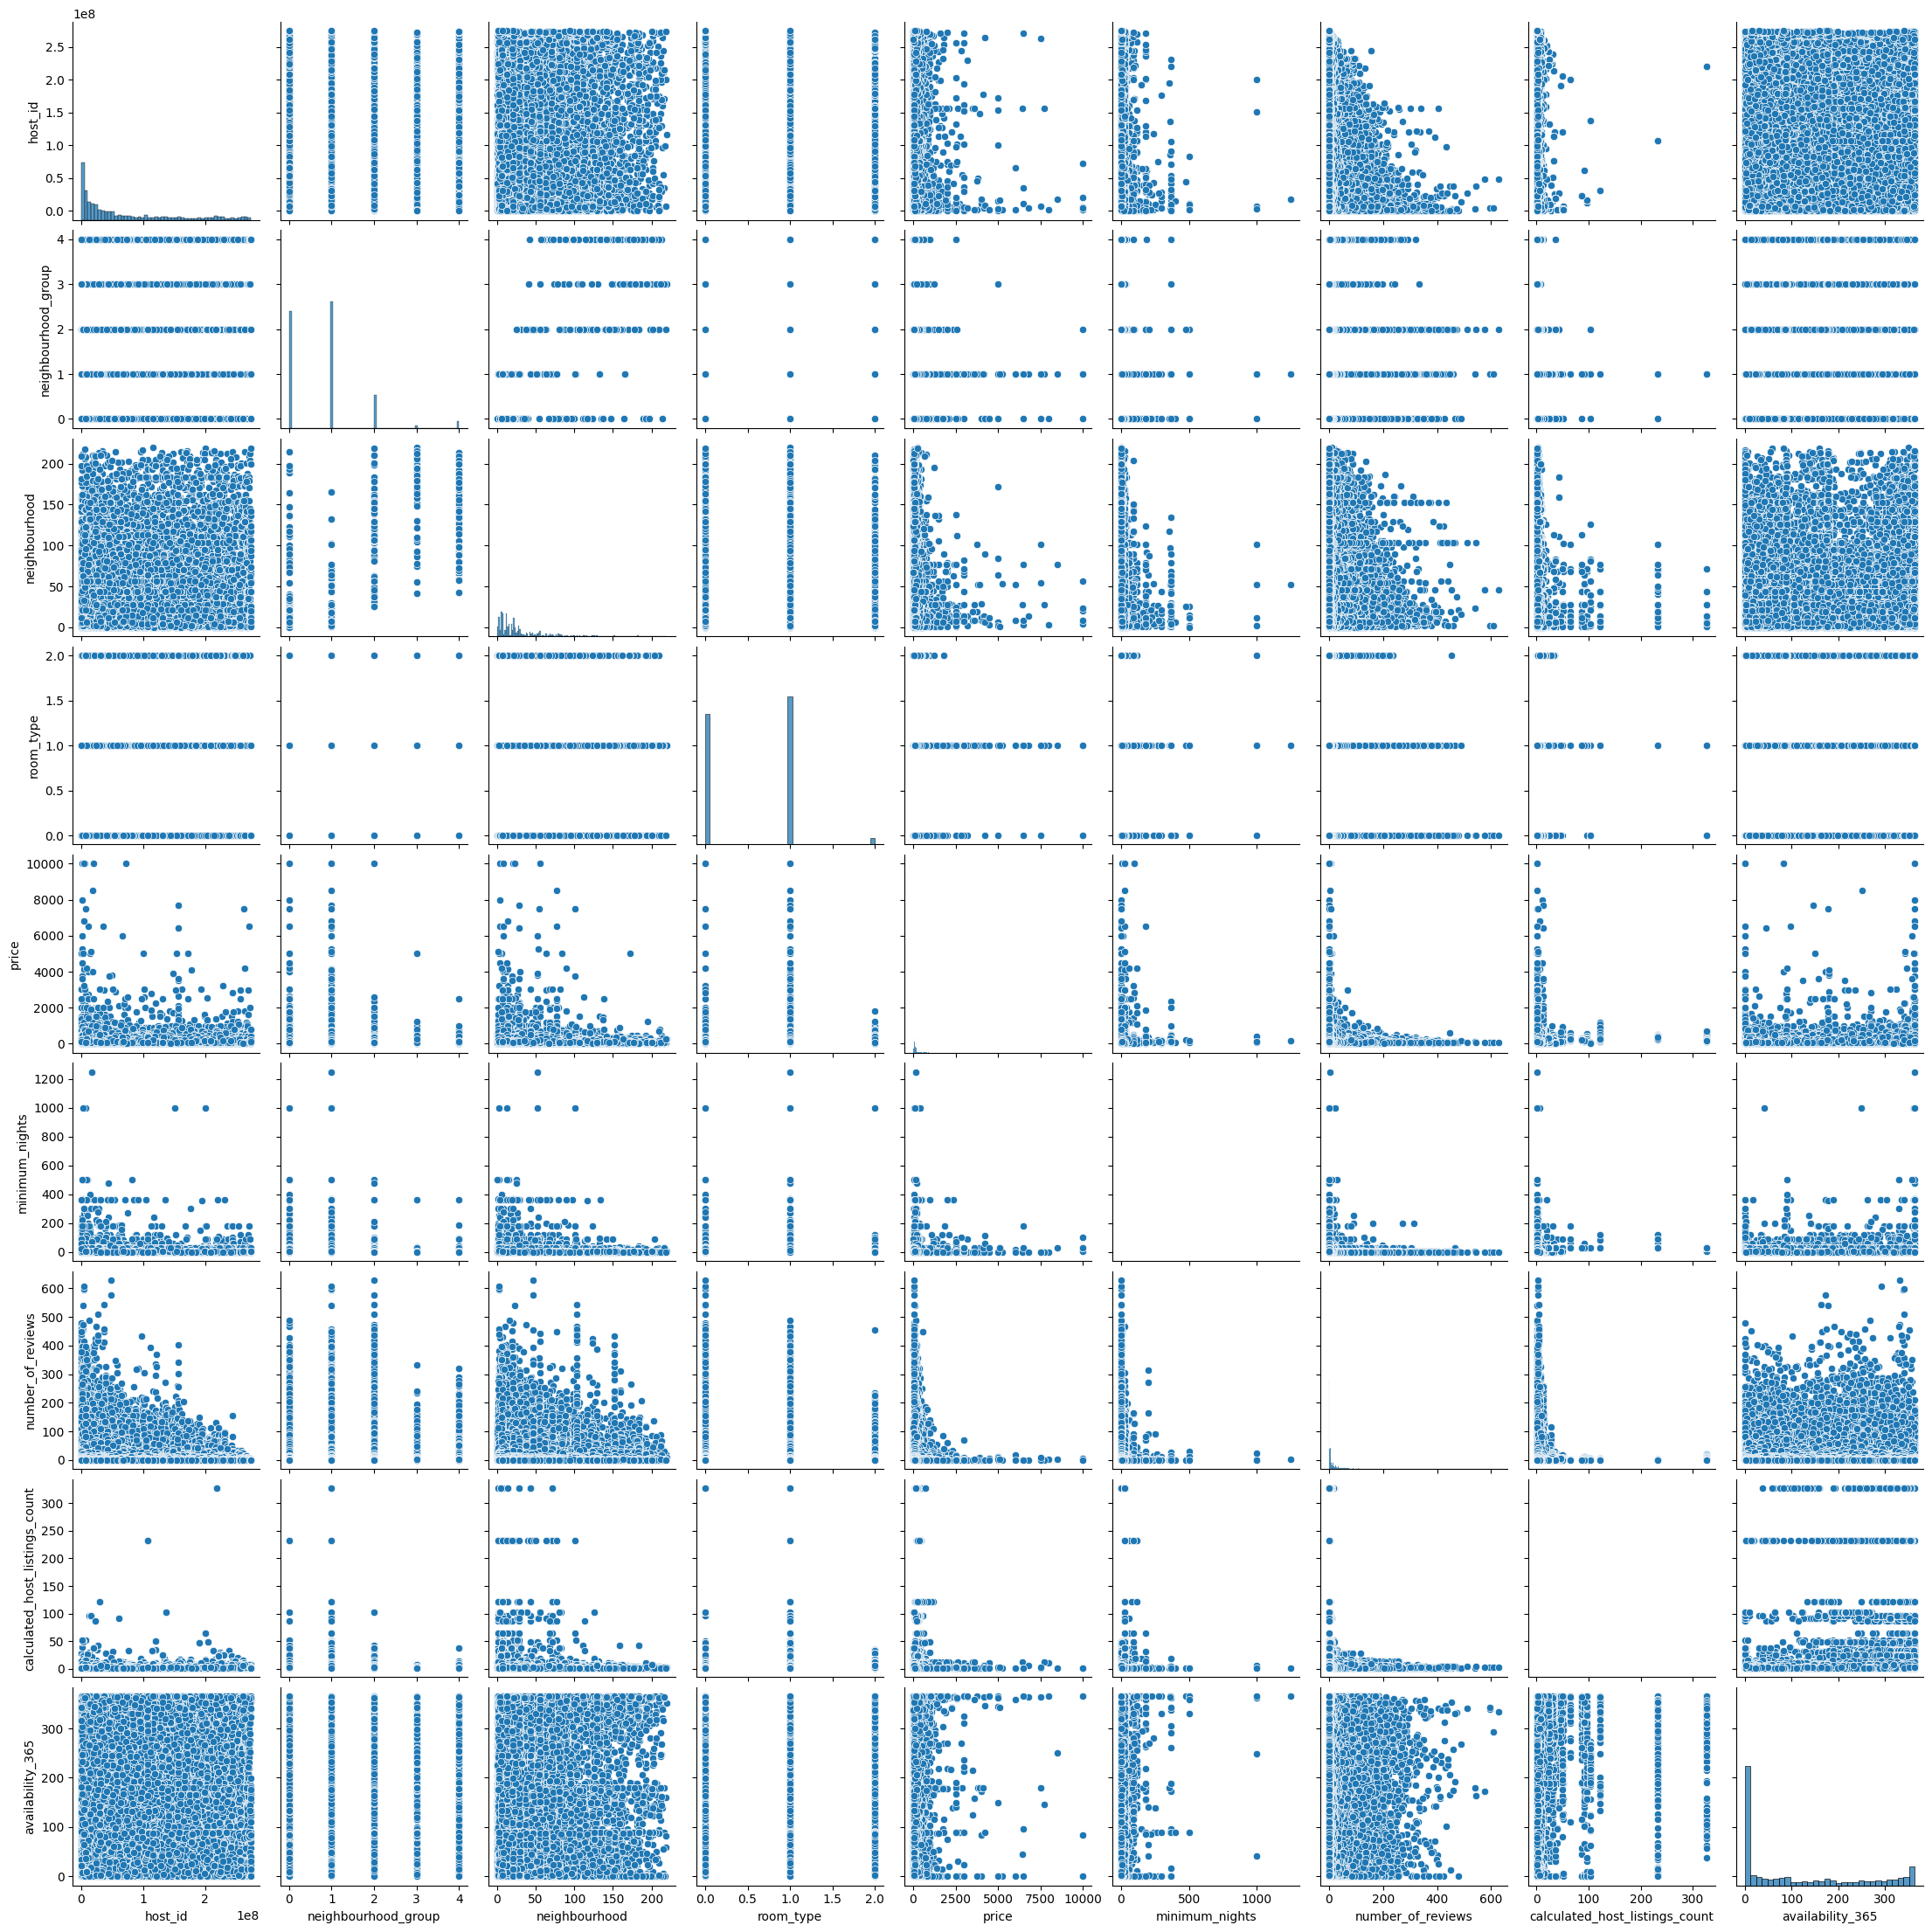

In [72]:
sns.pairplot(data = data_c)

#### Step 5: Feature engineering

Outlier analysis

In [81]:
data_c.describe()

,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,0.786911,29.888782,0.567113,152.720687,7.029962,23.274466,7.143982,112.781327
std,7.861097e+07,0.844386,34.676634,0.541249,240.154170,20.510550,44.550582,32.952519,131.622289
min,2.438000e+03,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,0.000000,7.500000,0.000000,69.000000,1.000000,1.000000,1.000000,0.000000
50%,3.079382e+07,1.000000,19.000000,1.000000,106.000000,3.000000,5.000000,1.000000,45.000000
75%,1.074344e+08,1.000000,37.000000,1.000000,175.000000,5.000000,24.000000,2.000000,227.000000
max,2.743213e+08,4.000000,220.000000,2.000000,10000.000000,1250.000000,629.000000,327.000000,365.000000


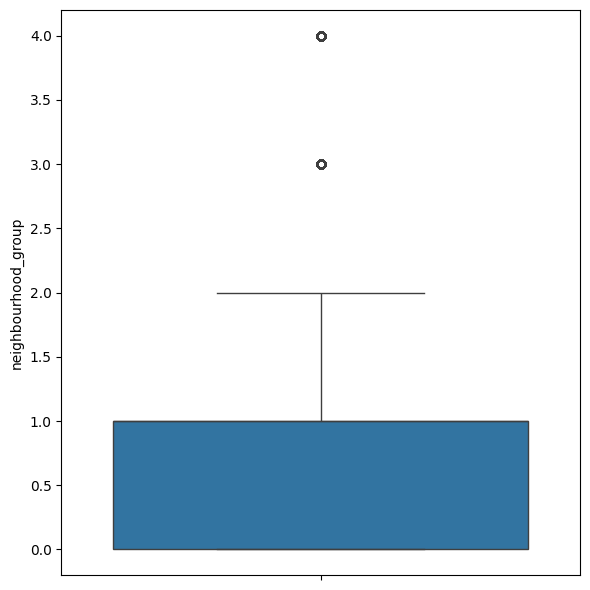

In [82]:
plt.figure(figsize=(6,6))
sns.boxplot(data = data_c, y = "neighbourhood_group")
plt.tight_layout()
plt.show()

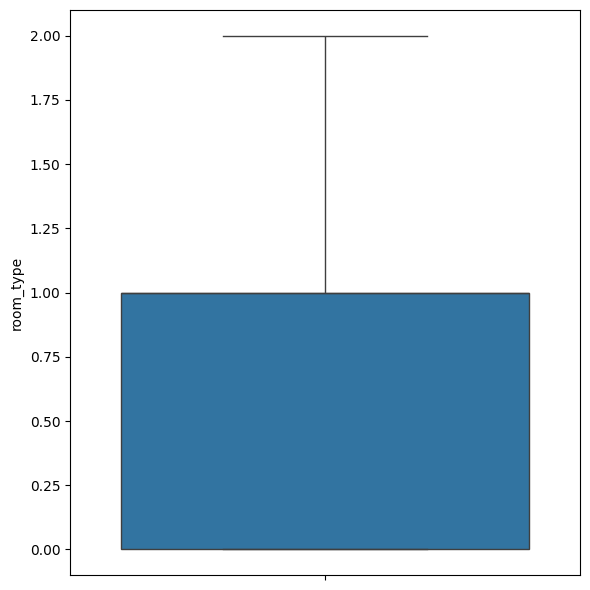

In [83]:
plt.figure(figsize=(6,6))
sns.boxplot(data = data_c, y = "room_type")
plt.tight_layout()
plt.show()

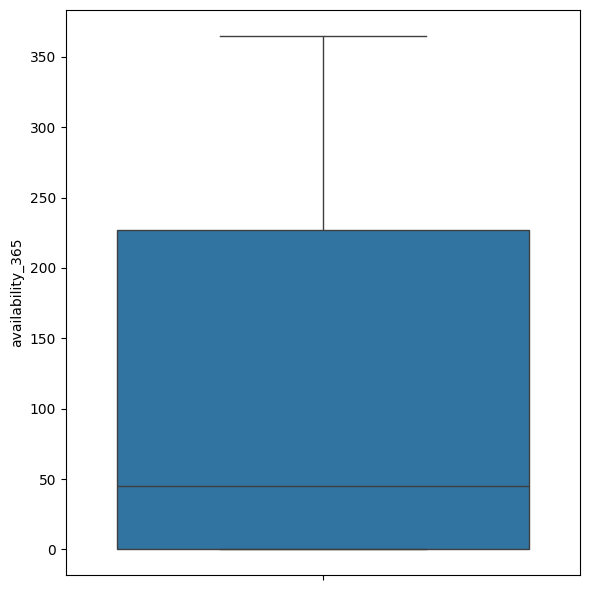

In [84]:
plt.figure(figsize=(6,6))
sns.boxplot(data = data_c, y = "availability_365")
plt.tight_layout()
plt.show()

In [85]:
print("From previous analysis we can easily determine that the variables affected by outliers are price, minimum_nights, number_of_reviews, calculated_host_listings_count.")

From previous analysis we can easily determine that the variables affected by outliers are price, minimum_nights, number_of_reviews, calculated_host_listings_count.


Missing value analysis

In [86]:
data_c.isnull().sum().sort_values(ascending=False)

host_id                           0
neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

Feature scaling

In [88]:
from sklearn.preprocessing import MinMaxScaler

num_variables = ["number_of_reviews", "minimum_nights", "calculated_host_listings_count", 
                 "availability_365", "neighbourhood_group", "room_type"]
scaler = MinMaxScaler()
scal_features = scaler.fit_transform(data_c[num_variables])
df_scal = pd.DataFrame(scal_features, index = data_c.index, columns = num_variables)
df_scal["price"] = data_c["price"]
df_scal.head()

,number_of_reviews,minimum_nights,calculated_host_listings_count,availability_365,neighbourhood_group,room_type,price
0,0.014308,0.000000,0.015337,1.000000,0.00,0.0,149
1,0.071542,0.000000,0.003067,0.972603,0.25,0.5,225
2,0.000000,0.001601,0.000000,1.000000,0.25,0.0,150
3,0.429253,0.000000,0.000000,0.531507,0.00,0.5,89
4,0.014308,0.007206,0.000000,0.000000,0.25,0.5,80


#### Step 6: Feature selection

In [89]:
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split

X = df_scal.drop("price", axis = 1)
y = df_scal["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


selection_model = SelectKBest(chi2, k = 4)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,number_of_reviews,calculated_host_listings_count,availability_365,room_type
0,0.017488,0.000000,0.002740,0.5
1,0.003180,0.000000,0.000000,0.0
2,0.000000,0.003067,0.000000,0.0
3,0.138315,0.000000,0.731507,0.5
4,0.020668,0.000000,0.000000,0.0


Save the clean and raw data

In [90]:
X_train_sel["price"] = list(y_train)
X_test_sel["price"] = list(y_test)
X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)